### __BUSA8001 Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 4 November 2022 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 4 November 2022 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of up to 3 students (minimum 2) and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models

- You will:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1](https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses 
- All team members should work on all the tasks listed below however   
    - **Choose a team member who will be responsible for one of each of the 3 tasks listed below**    

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 7 marks will be deducted from each Task for which there is no video presentation 

**Competition Marks:**  

- 2 marks: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit  (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 7 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA8001_Team 1`
- Team Leader and Team Member 1: `Duy Pham - 47522003 - Task 2`
- Team Member 2: `Thi Kim Ngan Do - 46235752 - Task 1`
- Team Member 3: `Ahsan Adil Nibir - 44397836 - Task 3`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1](https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem
    - Evaluation Criteria
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Note: you should **not** discuss any specific predictive algorithms at this stage.
    
Total Marks: 12


The Problem: Currently there is no convenient way for a new Airbnb host to decide the price of his or her listing. New hosts must often rely on the price of neighbouring listings when deciding on the price of their own listing.

Our project aims at predicting Airbnb listing prices for Melbourne based on the characteristics of listed properties to help hosts decide reasonable price. A Predictive Price Modelling tool whereby a new host can enter all the relevant details such as location of the listing, listing properties, available amenities etc and the Machine Learning Model will suggest the Price for the listing. We will train and make comparisons between different methods. 

Evaluation Criteria:

In this project, we will employ MSE to evaluate the performance of the linear regression model, Decision Trees and Random Forests.
The Mean Squared Error (MSE) is the average of the summation of the squared difference between the estimated values and actual values. It is an important to reduce the value of MSE in evaluating the performance of machine learning models. 

$MSE=\frac{1}{n}\sum_{i=1}^n\left(y_{i} - \hat{y}_{i}\right)^2$


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from datetime import date
from datetime import datetime

import math

import warnings
warnings.filterwarnings('ignore')
df_submit= pd.read_csv('sample_submission.csv') #load submission sample
df_train = pd.read_csv('train.csv') # load train dataset
df_test = pd.read_csv('test.csv') # load test dataset

df_test['type'] = "test"
df_train['type'] = "train"

df = pd.concat([df_test, df_train])

print('df_train:',df_train.shape)
print('df_test:',df_test.shape)
print('df:',df.shape)



df_train: (7000, 62)
df_test: (3000, 61)
df: (10000, 62)


Dataset provided are divided into training data (7000 observations) and test data (3000 observations) separately. Training data consists of 7000 entries and 61 variables, while test dataset contains 3000 observations and 60 variables and the target variable is price that we will predict later.


In [2]:
print('df.info()\n',df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 6999
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            10000 non-null  int64  
 1   source                                        10000 non-null  object 
 2   name                                          9999 non-null   object 
 3   description                                   9924 non-null   object 
 4   neighborhood_overview                         6739 non-null   object 
 5   host_name                                     10000 non-null  object 
 6   host_since                                    10000 non-null  object 
 7   host_location                                 7924 non-null   object 
 8   host_about                                    6269 non-null   object 
 9   host_response_time                            9612 non-null   

int64, float64 and object are the data types of our features. Here we found that there are 27 variables which are object or string, 34 features are numeric. Then we need to convert that string to the integer data only. There are 4 types of features:
-	Numerical variables: accommodates, bathrooms, bedrooms, beds minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, maximum_nights_avg_ntm, availability_30, availability_60, availability_90, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy,etc.
-	Nominal categorical variables: host_response_time ,host_verifications, Private room in home, room_type, bathroom, bedrooms	
-	Binary categorical variables (True /False): sort, host_is_superhost , host_has_profile_pic, host_identity_verified, has_availability, instant_bookable	
-	Date: first_review, last_review, host_since


In [3]:
#check null values
df.isnull().sum().sort_values(ascending = False).head(31)                                      

host_neighbourhood             5554
host_about                     3731
neighborhood_overview          3261
neighbourhood                  3261
price                          3000
host_location                  2076
bedrooms                        440
host_acceptance_rate            391
host_response_time              388
host_response_rate              388
room_type                       175
review_scores_checkin           169
review_scores_location          169
review_scores_cleanliness       169
review_scores_value             169
review_scores_accuracy          169
review_scores_communication     168
neighbourhood_cleansed          150
review_scores_rating            123
reviews_per_month               123
last_review                     123
first_review                    123
property_type                   123
beds                             97
description                      76
availability_365                 67
maximum_maximum_nights           55
minimum_minimum_nights      

As we can see, there are 30 variables containing null values that we need to clean in the next step

Main data characteristics

In [4]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10000.0,NaN,NaN,NaN,4999.5,2886.89568,0.0,2499.75,4999.5,7499.25,9999.0
source,10000,2,city scrape,8940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,9999,9746,墨尔本东北区Bundoora温馨独栋别墅，房间干净整齐、设施齐全、交通方便、高速网络、高档床...,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,9924,9391,Rise and shine with the best of Melbourne on y...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,6739,5641,Melbourne - Voted most livable city in the wor...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
calculated_host_listings_count_private_rooms,10000.0,NaN,NaN,NaN,3.2876,21.001919,0.0,0.0,0.0,1.0,168.0
calculated_host_listings_count_shared_rooms,10000.0,NaN,NaN,NaN,0.0335,0.409139,0.0,0.0,0.0,0.0,13.0
reviews_per_month,9877.0,NaN,NaN,NaN,1.585362,1.791966,0.01,0.42,1.05,2.19,49.27
type,10000,2,train,7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From this table, we get the summary of the categorical variables:
-	' count' which count the number of non-missing values. For example, ‘name’ variable is missing 1 value
-	‘unique’ (number of unique values): eg.  There are 5641 unique values in neighborhood_overview. The remainings are duplicated.
-	‘top’ (the most frequent value), and the frequency of the most frequent value. As we can observe from the table, the most popular price for Airbnb is 120$


`(Task 1, Text Here - insert more cells as required)`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without exaplaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [5]:
## Task 2, Question 1 Code Here

# clean price column in train dataset
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

# clean 'host_response_rate'
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '') # eliminate text
df['host_response_rate'] = df['host_response_rate'].astype('float') # change datatype to float

# clean 'host_acceptance_rate'
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype('float')

# clean 'host_verifications'
df['host_verifications'] = df['host_verifications'].str.replace('[', '')
df['host_verifications'] = df['host_verifications'].str.replace(']', '')
df['host_verifications'] = df['host_verifications'].str.replace("'", '')

# clean 'host_verifications'

df['Neighbour'] = df['neighbourhood'].str.split(' ').str[0] #make Neighbour column from the existing neighbourhood
df['Neighbour'] = df['Neighbour'].str.replace(",", '')

# bathrooms

#clean text
df['bathrooms'] = df['bathrooms'].str.replace('Half-bath','0.5')
df['bathrooms'] = df['bathrooms'].str.replace('Shared half-bath','0.5')
df['bathrooms'] = df['bathrooms'].str.replace('Private half-bath','0.5')
df['bathrooms'] = df['bathrooms'].str.replace('baths','')
df['bathrooms'] = df['bathrooms'].str.replace('bath','')
df['bathrooms'] = df['bathrooms'].str.replace('shared','')
df['bathrooms'] = df['bathrooms'].str.replace('private','')
df['bathrooms'] = df['bathrooms'].astype('float') # change data type



`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [6]:
## Task 2, Question 2 Code Here

# host_since 
df['host_since'] =(pd.Timestamp.now()- pd.to_datetime(df['host_since'], dayfirst=True)).dt.days # count day until now

# host_verifications

dummy_host_verifications = df['host_verifications'].str.get_dummies(', ') # split host_verification into email,phone,work_email columns
df = pd.concat([df, dummy_host_verifications], axis = 1) # join columns into dataframe

# host_location 

df[['City', 'Country']] = df['host_location'].str.split(', ', 1, expand=True) # split host location to city and country
df['Country'].fillna('Other Country', inplace = True) # fill na with Australia
df['Country'][df['Country']!= 'Australia']= 'Other Country' # Change other country to 'Other Country'
df['City'].fillna('Other City', inplace = True) # fill NA with 'Other City'
df['City'] = df['City'].where(df['Country'] !='Other Country','Other City') # for city in other countries, change to 'Other City'

# neighbourhood

df['Neighbour'] = df['neighbourhood'].str.split(' ').str[0] #make Neighbour column from the existing neighbourhood
df['Neighbour'] = df['Neighbour'].str.replace(",", '') 

# first_review

df['first_review'] =(pd.Timestamp.now()- pd.to_datetime(df['first_review'], dayfirst=True)).dt.days # count day until now

# last_review

df['last_review'] =(pd.Timestamp.now()- pd.to_datetime(df['last_review'], dayfirst=True)).dt.days # count day until now

`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets.   
(3 marks)

In [7]:
## Task 2, Question 3 Code Here

df['host_response_rate'].fillna(df['host_response_rate'].mean(), inplace = True)

df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean(), inplace = True)

room_type_list = df['room_type'].value_counts().index.tolist() 
df.loc[df['room_type'].isin(room_type_list) == False, 'room_type'] = df['room_type'].mode()[0] # fill na with most frequent values, fillna() didn't work

bathrooms_list = df['bathrooms'].value_counts().index.tolist() 
df.loc[df['bathrooms'].isin(bathrooms_list) == False, 'bathrooms'] = df['bathrooms'].mean() # fill na with most frequent values, fillna() didn't work

bedrooms_list = df['bedrooms'].value_counts().index.tolist() 
df.loc[df['bedrooms'].isin(bedrooms_list) == False, 'bedrooms'] = df['bedrooms'].median() # fill na with most frequent values, fillna() didn't work

beds_list = df['beds'].value_counts().index.tolist() 
df.loc[df['beds'].isin(beds_list) == False, 'beds'] = df['beds'].median() # fill na with most frequent values, fillna() didn't work

df['minimum_nights'].fillna(df['minimum_nights'].median(), inplace = True)

df['maximum_nights'].fillna(df['maximum_nights'].mean(), inplace = True)

minimum_minimum_nights_list = df['minimum_minimum_nights'].value_counts().index.tolist() 
df.loc[df['minimum_minimum_nights'].isin(minimum_minimum_nights_list) == False, 'minimum_minimum_nights'] = df['minimum_minimum_nights'].median() # fill na with most frequent values, fillna() didn't work

maximum_maximum_nights_list = df['maximum_maximum_nights'].value_counts().index.tolist() 
df.loc[df['maximum_maximum_nights'].isin(maximum_maximum_nights_list) == False, 'maximum_maximum_nights'] = df['maximum_maximum_nights'].median() # fill na with most frequent values, fillna() didn't work

availability_365_list = df['availability_365'].value_counts().index.tolist() 
df.loc[df['availability_365'].isin(availability_365_list) == False, 'availability_365'] = df['availability_365'].mean() # fill na with most frequent values, fillna() didn't work

first_review_list = df['first_review'].value_counts().index.tolist() 
df.loc[df['first_review'].isin(first_review_list) == False, 'first_review'] = df['first_review'].mean() # fill na with most frequent values, fillna() didn't work

last_review_list = df['last_review'].value_counts().index.tolist() 
df.loc[df['last_review'].isin(last_review_list) == False, 'last_review'] = df['last_review'].mean() # fill na with most frequent values, fillna() didn't work

review_scores_rating_list = df['review_scores_rating'].value_counts().index.tolist() 
df.loc[df['review_scores_rating'].isin(review_scores_rating_list) == False, 'review_scores_rating'] = df['review_scores_rating'].mean() # fill na with most frequent values, fillna() didn't work

review_scores_accuracy_list = df['review_scores_accuracy'].value_counts().index.tolist() 
df.loc[df['review_scores_accuracy'].isin(review_scores_accuracy_list) == False, 'review_scores_accuracy'] = df['review_scores_accuracy'].mean() # fill na with most frequent values, fillna() didn't work

review_scores_cleanliness_list = df['review_scores_cleanliness'].value_counts().index.tolist() 
df.loc[df['review_scores_cleanliness'].isin(review_scores_cleanliness_list) == False, 'review_scores_cleanliness'] = df['review_scores_cleanliness'].mean() # fill na with most frequent values, fillna() didn't work

review_scores_checkin_list = df['review_scores_checkin'].value_counts().index.tolist() 
df.loc[df['review_scores_checkin'].isin(review_scores_checkin_list) == False, 'review_scores_checkin'] = df['review_scores_checkin'].mean() # fill na with most frequent values, fillna() didn't work

review_scores_communication_list = df['review_scores_communication'].value_counts().index.tolist() 
df.loc[df['review_scores_communication'].isin(review_scores_communication_list) == False, 'review_scores_communication'] = df['review_scores_communication'].mean() # fill na with most frequent values, fillna() didn't work

review_scores_location_list = df['review_scores_location'].value_counts().index.tolist() 
df.loc[df['review_scores_location'].isin(review_scores_location_list) == False, 'review_scores_location'] = df['review_scores_location'].mean() # fill na with most frequent values, fillna() didn't work

review_scores_value_list = df['review_scores_value'].value_counts().index.tolist() 
df.loc[df['review_scores_value'].isin(review_scores_value_list) == False, 'review_scores_value'] = df['review_scores_value'].mean() # fill na with most frequent values, fillna() didn't work

reviews_per_month_list = df['reviews_per_month'].value_counts().index.tolist() 
df.loc[df['reviews_per_month'].isin(reviews_per_month_list) == False, 'reviews_per_month'] = df['reviews_per_month'].mean() # fill na with most frequent values, fillna() didn't work



`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode.  
(2 marks)

In [8]:
## Task 2, Question 4 Code Here
df["source"] = ord_enc.fit_transform(df[["source"]])

df['host_name'].value_counts()[:5].sort_values(ascending=False) # get 5 most frequent names, the rest change to 'other'
host_name_list = df['host_name'].value_counts()[:5].index.tolist() # get list of 5 most frequent names
df.loc[df['host_name'].isin(host_name_list) == False, 'host_name'] = 'other name'
dummy_host_name = pd.get_dummies(df['host_name']) # Get dummy for host_name
df = pd.concat([df, dummy_host_name], axis = 1)
df.drop('host_name', axis = 1,inplace = True)

dummy_country = pd.get_dummies(df['Country']) # create dummy for country
df = pd.concat([df,dummy_country], axis = 1)

df['City'].value_counts()[:5].sort_values(ascending=False) # get 5 most frequent City, the rest change to 'Other city'
host_city_list = df['City'].value_counts()[:5].index.tolist() # get list of 5 most frequent names
df.loc[df['City'].isin(host_city_list) == False, 'City'] = 'Other City'
dummy_city = pd.get_dummies(df['City']) #Create dummy for city
df = pd.concat([df, dummy_city], axis = 1)

enc = OrdinalEncoder(categories=[['within an hour', 'within a few hours', 'within a day', 'a few days or more']])
df["host_response_time"] = ord_enc.fit_transform(df[["host_response_time"]])
df['host_response_time'].fillna(df['host_response_time'].mode()[0], inplace = True) # replace NA with the most frequent value ' unknown respond'

dummy_superhost = pd.get_dummies(df['host_is_superhost'])
dummy_superhost.rename(columns={'t': 'Superhost', 'f': 'Not Superhost'},inplace = True)
df = pd.concat([df, dummy_superhost], axis = 1)

df['host_neighbourhood'].value_counts()[:5].sort_values(ascending=False) 
host_neighbourhood_list = df['host_neighbourhood'].value_counts()[:5].index.tolist() 
df.loc[df['host_neighbourhood'].isin(host_neighbourhood_list) == False, 'host_neighbourhood'] = 'Other Neighbourhood'
dummy_host_neighbourhood = pd.get_dummies(df['host_neighbourhood'])
df = pd.concat([df, dummy_host_neighbourhood], axis = 1)

dummy_host_has_profile_pic = pd.get_dummies(df['host_has_profile_pic'])
dummy_host_has_profile_pic.rename(columns={'t': 'Has profile pic', 'f': 'No profile pic'},inplace = True)
df = pd.concat([df, dummy_host_has_profile_pic], axis = 1)

dummy_host_identity_verified = pd.get_dummies(df['host_identity_verified'])
dummy_host_identity_verified.rename(columns={'t': 'Host Verified', 'f': 'Host not Verified'},inplace = True)
df = pd.concat([df, dummy_host_identity_verified], axis = 1)

df['Neighbour'].value_counts()[:5].sort_values(ascending=False) # get 5 most neighbour
host_Neighbour_list = df['Neighbour'].value_counts()[:5].index.tolist() 
df.loc[df['Neighbour'].isin(host_Neighbour_list) == False, 'Neighbour'] = 'Other Neighbour'
dummy_Neighbour = pd.get_dummies(df['Neighbour'])
df = pd.concat([df, dummy_Neighbour], axis = 1)

df['property_type'].value_counts()[:5].sort_values(ascending=False) # get 5 most neighbour
host_property_type_list = df['property_type'].value_counts()[:5].index.tolist() 
df.loc[df['property_type'].isin(host_property_type_list) == False, 'property_type'] = 'Other property_type'
dummy_property_type = pd.get_dummies(df['property_type'])
df = pd.concat([df, dummy_property_type], axis = 1)

dummy_room_type = pd.get_dummies(df['room_type'])
df = pd.concat([df, dummy_room_type], axis = 1)

dummy_has_availability = pd.get_dummies(df['has_availability'])
dummy_has_availability.rename(columns={'t': 'has_availability_yes', 'f': 'has_availability_no'},inplace = True)
df = pd.concat([df, dummy_has_availability], axis = 1)

dummy_instant_bookable = pd.get_dummies(df['instant_bookable'])
dummy_instant_bookable.rename(columns={'t': 'instant_bookable_yes', 'f': 'instant_bookable_no'},inplace = True)
df = pd.concat([df, dummy_instant_bookable], axis = 1)
df.drop('instant_bookable', axis = 1,inplace = True)



`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [9]:
## Task 2, Question 5 Code Here

`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

In [10]:
## Task 2, Question 6 Code Here

# X list contains features to fit
X_list = []
X_list.extend(['source', 'Other Country', 'Australia'])
X_list.extend(dummy_host_name.columns)
X_list.append('host_since')
X_list.extend(dummy_city.columns)
X_list.append('host_response_time')
X_list.append('host_response_rate')
X_list.append('host_acceptance_rate')
X_list.extend(dummy_superhost.columns)
X_list.extend(dummy_host_neighbourhood.columns)
X_list.append('host_listings_count')
X_list.extend(dummy_host_verifications.columns)
X_list.extend(dummy_host_has_profile_pic.columns)
X_list.extend(dummy_host_identity_verified.columns)
X_list.extend(dummy_Neighbour.columns)
X_list.extend(dummy_property_type.columns)
X_list.extend(dummy_room_type.columns)
X_list.append('accommodates')
X_list.append('bathrooms')
X_list.append('bedrooms')
X_list.append('beds')
X_list.append('minimum_nights')
X_list.append('maximum_nights')
X_list.append('minimum_minimum_nights')
X_list.append('minimum_minimum_nights')
X_list.append('minimum_maximum_nights')
X_list.append('maximum_maximum_nights')
X_list.append('minimum_nights_avg_ntm')
X_list.append('maximum_nights_avg_ntm')
X_list.append('has_availability_yes')
X_list.append('has_availability_no')
X_list.append('availability_30')
X_list.append('availability_60')
X_list.append('availability_90')
X_list.append('availability_365')
X_list.append('number_of_reviews')
X_list.append('number_of_reviews_ltm')
X_list.append('number_of_reviews_l30d')
X_list.append('first_review')
X_list.append('last_review')
X_list.append('review_scores_rating')
X_list.append('review_scores_accuracy')
X_list.append('review_scores_cleanliness')
X_list.append('review_scores_checkins')
X_list.append('review_scores_communication')
X_list.append('review_scores_location')
X_list.append('review_scores_value')
X_list.append('instant_bookable_yes')
X_list.append('instant_bookable_no')
X_list.append('calculated_host_listings_count')
X_list.append('calculated_host_listings_count_entire_homes')
X_list.append('calculated_host_listings_count_private_rooms')
X_list.append('calculated_host_listings_count_shared_rooms')
X_list.append('reviews_per_month')
X_list = list(set(X_list))

In [11]:
# split the data into train and test dataset
df_train = df[df['type'] == "train"]
df_test = df[df['type'] == "test"]

# split into X and y
X_train = df_train[df_train.columns[df_train.columns.isin(X_list)]]
y_train = df_train['price']
X_test = df_test[df_test.columns[df_test.columns.isin(X_list)]]


y_list = X_list.copy()
y_list.append('price')
result = df_train[df_train.columns[df_train.columns.isin(y_list)]]
result['price'] = result['price'].astype('float')
correlation = pd.DataFrame(result.corr()['price'])
print('Correlation between "price" and other features')
print(correlation.sort_values('price',ascending=False)[:10])


Correlation between "price" and other features
                           price
price                   1.000000
has_availability_no     0.166959
bedrooms                0.077317
accommodates            0.076764
bathrooms               0.068749
availability_30         0.067838
beds                    0.067718
availability_60         0.056399
availability_90         0.048513
minimum_minimum_nights  0.041300


`(Task 2, Question 6 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well you will need to iterate Task 3, building and tuning various models in order to find the best one.

Total Marks: 12

Ans: As we can see from the dataset, we couldnt find many features that are correlated with price to a big degree, so we will use the whole dataset as all attributes are somehow related to price.

In [12]:
from sklearn.preprocessing import StandardScaler
# Scale features

sc = StandardScaler()

sc.fit(X_train)
X_train_scaled = sc.transform(X_train)

X_test_scaled = sc.transform(X_test)

In [13]:
#Task 3 code here

# Starting off with Linear Regression Model
lr_s = LinearRegression().fit(X_train_scaled, y_train)

y_lr_train_scaled_pred = lr_s.predict(X_train_scaled)
y_lr_test_scaled_pred = lr_s.predict(X_test_scaled)

lr = LinearRegression().fit(X_train, y_train)
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

print(f'Training MSE linear scaled: {mean_squared_error(y_train, y_lr_train_scaled_pred,squared = False):.3f}')
print(f'Training MSE linear: {mean_squared_error(y_train, y_lr_train_pred,squared = False):.3f}')



Training MSE linear scaled: 1285.009
Training MSE linear: 1283.256


In [14]:
# Lasso

from sklearn.linear_model import Lasso
    
lasso = Lasso(alpha=0.1) # alpha = lambda (above)

ls_s = lasso.fit(X_train_scaled, y_train)

y_lasso_train_scaled_pred = ls_s.predict(X_train_scaled)
y_lasso_test_scaled_pred = ls_s.predict(X_test_scaled)

ls = lasso.fit(X_train, y_train)

y_lasso_train_pred = ls.predict(X_train)
y_lasso_test_pred = ls.predict(X_test)

print(f'Training MSE lasso scaled: {mean_squared_error(y_train, y_lasso_train_scaled_pred,squared = False):.3f}')
print(f'Training MSE lasso: {mean_squared_error(y_train, y_lasso_train_pred,squared = False):.3f}')

Training MSE lasso scaled: 1283.299
Training MSE lasso: 1283.408


In [15]:
#RANSAC
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         residual_threshold=2.0,   # example an inlier if distance from the fitted line within 5 units
                         random_state=1)

rs_s = ransac.fit(X_train_scaled, y_train)

y_ransac_train_scaled_pred = rs_s.predict(X_train_scaled)
y_ransac_test_scaled_pred = rs_s.predict(X_test_scaled)

rs = ransac.fit(X_train, y_train)
y_ransac_train_pred = rs.predict(X_train)
y_ransac_test_pred = rs.predict(X_test)

print(f'Training MSE ransac scaled: {mean_squared_error(y_train, y_ransac_train_scaled_pred,squared = False):.3f}')
print(f'Training MSE ransac: {mean_squared_error(y_train, y_ransac_train_pred,squared = False):.3f}')

#results mean that 

Training MSE ransac scaled: 13435382072119.688
Training MSE ransac: 4864184.265


In [29]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse', 
                               n_jobs=-1)
fr = forest.fit(X_train, y_train)

y_fr_train_pred = fr.predict(X_train)
y_fr_test_pred = fr.predict(X_test)

fr_s = forest.fit(X_train_scaled, y_train)

y_fr_train_scaled_pred = fr_s.predict(X_train_scaled)
y_fr_test_scaled_pred = fr_s.predict(X_test_scaled)

print(f'Training MSE random forest scaled: {mean_squared_error(y_train, y_fr_train_scaled_pred,squared = False):.3f}')
print(f'Training MSE random forest: {mean_squared_error(y_train, y_fr_train_pred,squared = False):.3f}')


Training MSE random forest scaled: 497.126
Training MSE random forest: 493.925


Performance increases, which means more catergorical data in our dataset.
Random forest performs better with categorical data than linear regression or Lasso
This also performs well because doing variable selection is not that important in Random Forest.

In [17]:
# BaggingRegressor

from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(n_jobs=-1)
bg = bagging.fit(X_train, y_train)

y_bg_train_pred = bg.predict(X_train)
y_bg_test_pred = bg.predict(X_test)

bg_s = bagging.fit(X_train_scaled, y_train)

y_bg_train_scaled_pred = bg_s.predict(X_train_scaled)
y_bg_test_scaled_pred = bg_s.predict(X_test_scaled)

print(f'Training MSE bagging scaled: {mean_squared_error(y_train, y_bg_train_scaled_pred,squared = False):.3f}')
print(f'Training MSE bagging: {mean_squared_error(y_train, y_bg_train_pred,squared = False):.3f}')


Training MSE bagging scaled: 608.642
Training MSE bagging: 643.230


In Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, 
However, in bagging all features are considered for splitting a node, that means some of our features need to be eliminated.
As we have not eliminated any features, Random Forest works better than Bagging Regressor.

In [18]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

AdaBoost = AdaBoostRegressor()
ada = AdaBoost.fit(X_train, y_train)

y_ada_train_pred = ada.predict(X_train)
y_ada_test_pred = ada.predict(X_test)

ada_s = AdaBoost.fit(X_train_scaled, y_train)

y_ada_train_scaled_pred = ada_s.predict(X_train_scaled)
y_ada_test_scaled_pred = ada_s.predict(X_test_scaled)

print(f'Training MSE AdaBoost scaled: {mean_squared_error(y_train, y_ada_train_scaled_pred,squared = False):.3f}')
print(f'Training MSE AdaBoost: {mean_squared_error(y_train, y_ada_train_pred,squared = False):.3f}')

Training MSE AdaBoost scaled: 451.436
Training MSE AdaBoost: 421.051


At this point, we predicted using Random Forest and it gave us better results
That is because it efficiently manages a higher-dimension data set.
It handles missing quantities and maintains high accuracy for missing data unlike AdaBoost, which is prone to overfitting. 


In [19]:
#Doing polynomial with quadratic features

from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train, y_train)

X_quad

lr_1 = LinearRegression()
lr_2 = LinearRegression()

# ----- fit linear features
lr_1.fit(X_train, y_train)
y_lin_fit = lr_1.predict(X_train)

# ----- fit quadratic features
lr_2.fit(X_quad, y_train)
y_quad_fit = lr_2.predict(X_quad)

y_lin_pred = lr_1.predict(X_train)

y_quad_pred = lr_2.predict(X_quad)

print(f'Training MSE linear: {mean_squared_error(y_train, y_lin_pred, squared = False):.3f}, quadratic: {mean_squared_error(y_train, y_quad_pred, squared = False):.3f}')

Training MSE linear: 1283.256, quadratic: 1233.111


In [20]:
#Cross validating using Ridge Regression

from sklearn.linear_model import Ridge 

ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

print(f'Ridge MSE train: {mean_squared_error(y_train, y_train_pred_ridge,squared = False):.3f}')


Ridge MSE train: 1283.278


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1, probability=True))

In [22]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]  # range of values for C and gamma


param_grid = [{'svc__C': param_range,   # range of values for all parameters
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

In [23]:
gs = GridSearchCV(estimator=pipe_svc,      # initialise gs object
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,              # this will refit the best estimator to the whole dataset automatically
                  cv=2,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)            # fit gs

print(gs.best_score_)

print(gs.best_params_)


0.04557142857142857
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [24]:
pipe_svc2 = make_pipeline(StandardScaler(),
                          SVC(C=10.0, gamma=0.01, probability=True, random_state=1, kernel='rbf'))

In [25]:
pipe_svc2.fit(X_train, y_train)

y_pred_svc2 = pipe_svc2.predict(X_test)

In [26]:
y_pred_svc2

array(['65.00', '146.00', '150.00', ..., '80.00', '100.00', '350.00'],
      dtype=object)

In [27]:
df_submit= pd.read_csv('sample_submission.csv')
df_submit['price']= y_pred_svc2
df_submit.to_csv('submissionSVC.csv',index = False)

`(Task 3 - insert more cells as required)`

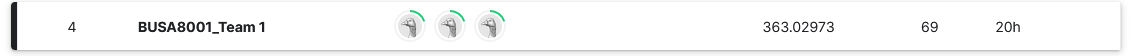

In the end, we decided to go with the pipeline model coupled with StandardScaler (to standardise the data) and SVC with rbf kernel, as per the gridsearch suggestion which gave us our best result.